In [23]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import time
import pandas as pd
from tqdm import tqdm

from urllib.parse import quote
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

import os

driver_name =  os.environ['HOMEDRIVE'] + os.environ['HOMEPATH'] + '\\downloads\\chromedriver.exe'

In [24]:

imdburl = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver = webdriver.Chrome(driver_name)
driver.get(imdburl)
time.sleep(2)

- "Load More" 버튼을 24회 눌러서 1000건의 데이터가 보이게 하기

In [25]:
for i in range(3):
    driver.find_element(By.ID, 'load-more-trigger').click()
    time.sleep(4)

- 글 내용을 펼치는 아이콘 누르기
    - 스포일러(class="expander-icon-wrapper show-more__control")
    - 긴 글(class="expander-icon-wrapper spoiler-warning__control")

In [26]:
divs = driver.find_elements(By.CSS_SELECTOR, '.lister-item.mode-detail.imdb-user-review')

count = 0
for div in divs:
    try:
        div.find_element(By.CSS_SELECTOR, '.expander-icon-wrapper').click()
        time.sleep(3)
        count += 1
    except:
        # print('except')
        continue

In [27]:
len(divs), count

(100, 57)

- 화면이 모두 펼쳐지면 BeautifulSoup( or driver)으로 크롤링

In [28]:

divs = driver.find_elements(By.CSS_SELECTOR, '.lister-item-content')

con_list = []
for div in divs:
    title = div.find_element(By.CSS_SELECTOR, '.title').text
    rate = div.find_elements(By.CSS_SELECTOR, '.rating-other-user-rating > span')
    rating = np.nan if len(rate) ==0 else float(rate[0].text.strip())
    
    text = div.find_element(By.CSS_SELECTOR, '.text.show-more__control').text
    con_list.append({'제목': title, '평점': rating, 'REVIEW': text })

df = pd.DataFrame(con_list)
df.head()
driver.close()

In [29]:
df.평점.mean(), df.평점.min(), df.평점.max()

(9.659090909090908, 7.0, 10.0)

- Word Cloud 만들기

In [30]:
reviews = ''
for i in df.index:
    reviews += df.제목[i] + '\n' + df.REVIEW[i] + '\n'

In [31]:
def grey_color(word, font_size, position, orientation, random_state, **kwargs):
    return f'hsl(0, 0%, {np.random.randint(60, 101)}%)'


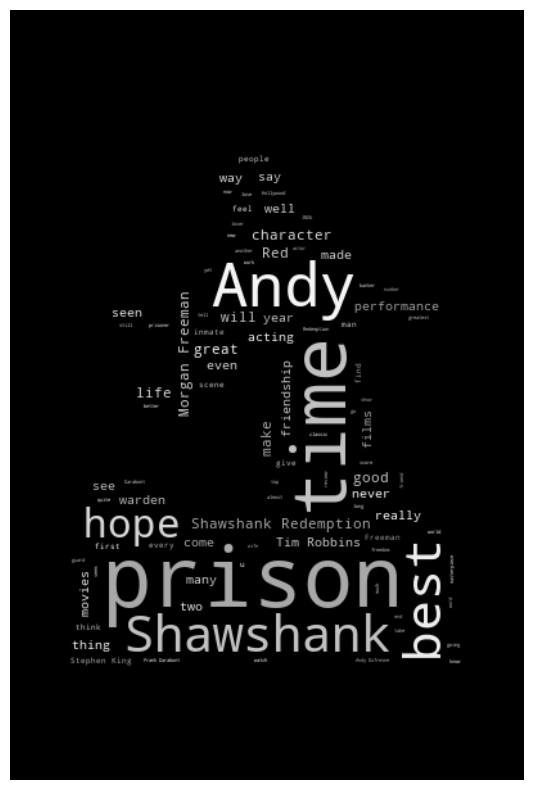

In [34]:
# 너무 많은 단어, 뻔한 단어, 중요하지 않는 단어 들을 제외하고 싶을 때
sw = STOPWORDS
sw.add('movie')
sw.add('one')
sw.add('story')
sw.add('film')

mask = np.array(Image.open('data/show.png'))
wc = WordCloud(
        mask=mask, max_words=1000, stopwords=sw,
        margin=10, random_state=2023
    ).generate(reviews)

default_colors = wc.to_array

plt.figure(figsize=(10, 10))
plt.imshow(wc.recolor(color_func=grey_color, random_state=2023),
           interpolation='bilinear')
plt.axis('off')
plt.show()